In [ ]:
import pandas as pd
import matplotlib as mpl
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install geopandas
!apt install gdal-bin python-gdal python3-gdal
!apt install python3-rtree 
import geopandas as gpd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Package python-gdal is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source
However the following packages replace it:
  gdal-bin

E: Package 'python-gdal' has no installation candidate
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-rtree is already the newest version (0.9.4-1).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.


In [ ]:
#downloading shapefile of Ukraine
!wget https://biogeo.ucdavis.edu/data/gadm3.6/shp/gadm36_UKR_shp.zip
!unzip gadm36_UKR_shp.zip

--2023-03-22 23:58:41--  https://biogeo.ucdavis.edu/data/gadm3.6/shp/gadm36_UKR_shp.zip
Resolving biogeo.ucdavis.edu (biogeo.ucdavis.edu)... 128.120.228.172
Connecting to biogeo.ucdavis.edu (biogeo.ucdavis.edu)|128.120.228.172|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.biogeo.ucdavis.edu/data/gadm3.6/shp/gadm36_UKR_shp.zip [following]
--2023-03-22 23:58:42--  https://data.biogeo.ucdavis.edu/data/gadm3.6/shp/gadm36_UKR_shp.zip
Resolving data.biogeo.ucdavis.edu (data.biogeo.ucdavis.edu)... 128.120.228.172
Connecting to data.biogeo.ucdavis.edu (data.biogeo.ucdavis.edu)|128.120.228.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2238196 (2.1M) [application/zip]
Saving to: ‘gadm36_UKR_shp.zip.1’

gadm36_UKR_shp.zip. 100%[===================>]   2.13M  4.25MB/s    in 0.5s    

2023-03-22 23:58:43 (4.25 MB/s) - ‘gadm36_UKR_shp.zip.1’ saved [2238196/2238196]

Archive:  gadm36_UKR_shp.zip
replace gadm36_UKR_0.cpg? [y

In [ ]:
map = gpd.read_file('/content/gadm36_UKR_1.shp')
map = map.set_geometry('geometry')
map.head(10)

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,UKR,Ukraine,UKR.1_1,Cherkasy,Cherkas'ka Oblast'|Cherkasskaya Oblast'|Cherkassy,NaN,Oblast',Region,NaN,UA.CK,"POLYGON ((31.32614 48.74507, 31.31716 48.74512..."
1,UKR,Ukraine,UKR.2_1,Chernihiv,Chernigov|Tschernigow,NaN,Oblast',Region,NaN,UA.CH,"POLYGON ((33.09283 50.50966, 33.09261 50.49788..."
2,UKR,Ukraine,UKR.3_1,Chernivtsi,Chernivets'ka Oblast'|Chernovitskaya Oblast'|C...,NaN,Oblast',Region,NaN,UA.CV,"POLYGON ((24.93280 47.72794, 24.93301 47.72995..."
3,UKR,Ukraine,UKR.4_1,Crimea,Crimée|Criméia|Krim|Krymskaya Respublika|Respu...,NaN,Autonomous Republic,Autonomous Republic,NaN,UA.KR,"MULTIPOLYGON (((33.79291 44.39153, 33.79465 44..."
4,UKR,Ukraine,UKR.5_1,Dnipropetrovs'k,Dnipropetrovsk|Dniepropietrovsk|Dnjepropetrowsk,NaN,Oblast',Region,NaN,UA.DP,"POLYGON ((33.93176 47.48407, 33.92332 47.49026..."
5,UKR,Ukraine,UKR.6_1,Donets'k,Donetsk|Donetskaya Oblast'|Donezk|Stalino,NaN,Oblast',Region,NaN,UA.DT,"MULTIPOLYGON (((37.67542 47.08208, 37.67542 47..."
6,UKR,Ukraine,UKR.7_1,Ivano-Frankivs'k,Ivano-Frankovsk|Ivano-Frankovskaya Oblast'|Sta...,NaN,Oblast',Region,NaN,UA.IF,"POLYGON ((24.48985 48.29008, 24.47929 48.30110..."
7,UKR,Ukraine,UKR.8_1,Kharkiv,Charkow|Jarkov|Karkov|Khar'kov,NaN,Oblast',Region,NaN,UA.KK,"POLYGON ((36.73418 48.61828, 36.71661 48.61870..."
8,UKR,Ukraine,UKR.9_1,Kherson,Cherson|Khersons'ka Oblast',NaN,Oblast',Region,NaN,UA.KS,"MULTIPOLYGON (((31.96903 46.20319, 31.96903 46..."
9,UKR,Ukraine,UKR.10_1,Khmel'nyts'kyy,Khmelnitsky|Khmelnytskyi|Chmelnizkij|Hmelnicki...,NaN,Oblast',Region,NaN,UA.KM,"POLYGON ((26.43747 48.53564, 26.43671 48.54154..."


<Axes: >

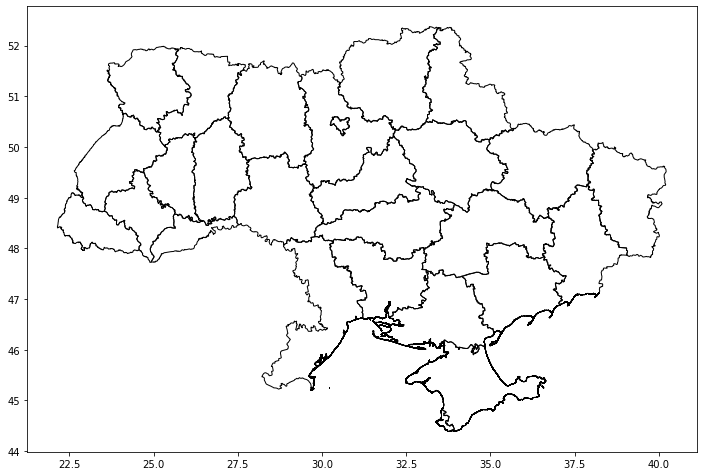

In [ ]:
#reading into a dataframe
ukraine_map = gpd.read_file('/content/gadm36_UKR_1.shp')
ukraine_map.plot(facecolor="none", figsize=(12, 12))

In [ ]:
ukraine_map.columns

Index(['GID_0', 'NAME_0', 'GID_1', 'NAME_1', 'VARNAME_1', 'NL_NAME_1',
       'TYPE_1', 'ENGTYPE_1', 'CC_1', 'HASC_1', 'geometry'],
      dtype='object')

In [ ]:
ukraine_map['NAME_1'] = ukraine_map['NAME_1'].replace(["Kiev"], "Kyiv")
# ukraine_map['NAME_1'] = ukraine_map['NAME_1'].replace(["Kiev City"], "Kyiv")
ukraine_map['NAME_1'] = ukraine_map['NAME_1'].replace(["L'viv"], "Lviv")
ukraine_map['NAME_1'] = ukraine_map['NAME_1'].replace(["Dnipropetrovs'k"], "Dnipropetrovsk")
ukraine_map['NAME_1'] = ukraine_map['NAME_1'].replace(["Donets'k"], "Donetsk")
ukraine_map['NAME_1'] = ukraine_map['NAME_1'].replace(["Khmel'nyts'kyy"], "Khmelnytskyi")
ukraine_map['NAME_1'] = ukraine_map['NAME_1'].replace(["Luhans'k"], "Luhansk")
ukraine_map['NAME_1'] = ukraine_map['NAME_1'].replace(["Ternopil'"], "Ternopil")
ukraine_map['NAME_1'] = ukraine_map['NAME_1'].replace(["Mykolayiv'"], "Mykolaiv")
ukraine_map['NAME_1'] = ukraine_map['NAME_1'].replace(["Odessa"], "Odesa")
ukraine_map['NAME_1'] = ukraine_map['NAME_1'].replace(["Vinnytsya"], "Vinnytsia")
ukraine_map['NAME_1'] = ukraine_map['NAME_1'].replace(["Zaporizhzhya'"], "Zaporizhzhia")
ukraine_map['NAME_1'] = ukraine_map['NAME_1'].replace(["Transcarpathia"], "Zakarpattia")

In [ ]:
df_final = pd.read_csv('/content/drive/MyDrive/112_Project_DataV2 (1).0')
df_final_pkl = pd.read_pickle('/content/drive/MyDrive/112_Project_DataV2.0.pkl')
df_final_pkl

,date,city,region,lat,lng,content
0,2022-03-02,[Kharkiv],Kharkiv,50.0000,36.2292,Kharkiv Missile striked school
1,2022-03-03,[nan],Kyiv,50.4500,30.5236,Hatne Kyiv region due to a powerful airstrike ...
2,2022-03-02,[Severodonetsk],Donetsk,48.9482,38.4879,Donetsk region Severodonetsk Kindergarten was ...
3,2022-03-03,[Kyiv],Kyiv,50.4500,30.5236,Kyiv russian cruise missile TAG
4,2022-03-02,[Kharkiv],Kharkiv,50.0000,36.2292,Kharkiv Consequences of airstrike on city hall
...,...,...,...,...,...,...
8789,2023-02-15,[nan],Donetsk,48.0089,37.8042,Donetsk region Residential high-rise buildings...
8790,2023-02-15,[nan],Kharkiv,50.0000,36.2292,"Kharkiv region Private houses, households dama..."
8791,2023-02-15,[nan],Kharkiv,50.0000,36.2292,"Kharkiv region Private houses, households dama..."
8792,2023-02-15,[Pokrovsk],Donetsk,48.2833,37.1833,Pokrovsk Donetsk region Residential high-rise ...


In [ ]:
df_final_pkl["region"].unique()

array(['Kharkiv', 'Kyiv', 'Donetsk', nan, 'Mykolaiv', 'Chernihiv', 'Sumy',
       'Zhytomyr', 'Ukraine', 'Luhansk', 'Odesa', 'Kherson', 'Lviv',
       'Vinnytsia', 'Dnipropetrovsk', 'Volyn', 'Poltava', 'Zaporizhzhia',
       'Rivne', 'Khmelnytskyi', 'Ternopil', 'Zakarpattia', 'Kirovohrad'],
      dtype=object)

In [ ]:
pkl_cong = df_final_pkl.groupby('region').count()
pkl_cong['region'] = pkl_cong.index
pkl_cong = pkl_cong[['region', 'date']]
pkl_cong['count'] = pkl_cong['date']
pkl_cong = pkl_cong[['count', 'region']]

In [ ]:
pkl_cong = pkl_cong.reset_index(drop=True)
pkl_cong

,count,region
0,149,Chernihiv
1,486,Dnipropetrovsk
2,2417,Donetsk
3,1472,Kharkiv
4,381,Kherson
5,10,Khmelnytskyi
6,12,Kirovohrad
7,850,Kyiv
8,410,Luhansk
9,41,Lviv


In [ ]:
df_final_pkl['geometry'] = gpd.points_from_xy(df_final_pkl['lng'], df_final_pkl['lat'])

In [ ]:
import matplotlib.pyplot as plt

<Axes: >

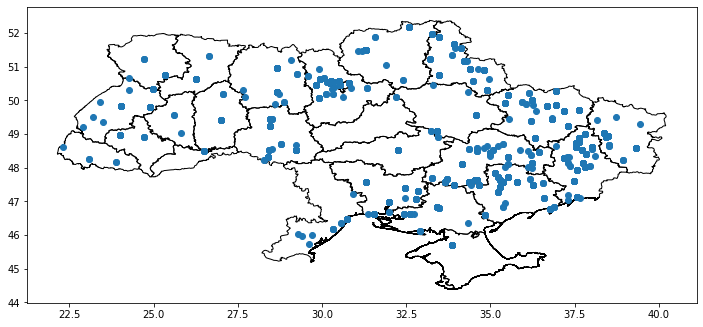

In [ ]:
new_df = pd.DataFrame()
new_df['geometry'] = df_final_pkl['geometry']

geo_df = gpd.GeoDataFrame(df_final_pkl)

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# ax = ukraine_map.plot(facecolor="none", figsize=(12,12))
ukraine_map.plot(facecolor="none", ax=ax)
geo_df.plot(ax=ax)


In [ ]:
df_final_pkl["region"].isna().sum()

557

In [ ]:
ukraine_map["region"] = ukraine_map["NAME_1"]
ukraine_map_merged = ukraine_map.merge(pkl_cong, on="region")

In [ ]:
ukraine_map_merged

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry,region,count
0,UKR,Ukraine,UKR.2_1,Chernihiv,Chernigov|Tschernigow,NaN,Oblast',Region,NaN,UA.CH,"POLYGON ((33.09283 50.50966, 33.09261 50.49788...",Chernihiv,149
1,UKR,Ukraine,UKR.5_1,Dnipropetrovsk,Dnipropetrovsk|Dniepropietrovsk|Dnjepropetrowsk,NaN,Oblast',Region,NaN,UA.DP,"POLYGON ((33.93176 47.48407, 33.92332 47.49026...",Dnipropetrovsk,486
2,UKR,Ukraine,UKR.6_1,Donetsk,Donetsk|Donetskaya Oblast'|Donezk|Stalino,NaN,Oblast',Region,NaN,UA.DT,"MULTIPOLYGON (((37.67542 47.08208, 37.67542 47...",Donetsk,2417
3,UKR,Ukraine,UKR.8_1,Kharkiv,Charkow|Jarkov|Karkov|Khar'kov,NaN,Oblast',Region,NaN,UA.KK,"POLYGON ((36.73418 48.61828, 36.71661 48.61870...",Kharkiv,1472
4,UKR,Ukraine,UKR.9_1,Kherson,Cherson|Khersons'ka Oblast',NaN,Oblast',Region,NaN,UA.KS,"MULTIPOLYGON (((31.96903 46.20319, 31.96903 46...",Kherson,381
5,UKR,Ukraine,UKR.10_1,Khmelnytskyi,Khmelnitsky|Khmelnytskyi|Chmelnizkij|Hmelnicki...,NaN,Oblast',Region,NaN,UA.KM,"POLYGON ((26.43747 48.53564, 26.43671 48.54154...",Khmelnytskyi,10
6,UKR,Ukraine,UKR.12_1,Kyiv,Kiev Oblast|Kiew|Kijew|Kiiv|Kijev|Kiyev|Kyiv|K...,NaN,Oblast',Region,NaN,UA.KV,"POLYGON ((29.74569 49.24075, 29.72713 49.25809...",Kyiv,850
7,UKR,Ukraine,UKR.13_1,Kirovohrad,Kirovograd|Kirovogradskaya Oblast',NaN,Oblast',Region,NaN,UA.KH,"POLYGON ((31.82397 47.79166, 31.83274 47.79161...",Kirovohrad,12
8,UKR,Ukraine,UKR.14_1,Lviv,Lemberg|Llvov|L'vov|Lwow|L'vivs'ka Oblast',NaN,Oblast',Region,NaN,UA.LV,"MULTIPOLYGON (((23.96410 50.41843, 23.96423 50...",Lviv,41
9,UKR,Ukraine,UKR.15_1,Luhansk,Luhansk|Lugansk|Luhans'ka Oblast'|Voroshilovgrad,NaN,Oblast',Region,NaN,UA.LH,"POLYGON ((39.91058 48.16798, 39.90993 48.16432...",Luhansk,410


<Axes: >

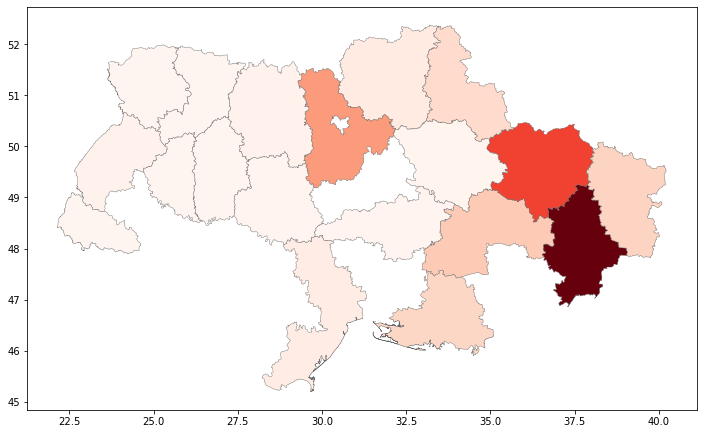

In [ ]:
fig, ax = plt.subplots(1, figsize=(12, 12))

ukraine_map_merged.plot(
    column="count", cmap="Reds", linewidth=0.4, ax=ax, edgecolor=".4"
)

In [ ]:
ukraine_map

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry,region
0,UKR,Ukraine,UKR.1_1,Cherkasy,Cherkas'ka Oblast'|Cherkasskaya Oblast'|Cherkassy,NaN,Oblast',Region,NaN,UA.CK,"POLYGON ((31.32614 48.74507, 31.31716 48.74512...",Cherkasy
1,UKR,Ukraine,UKR.2_1,Chernihiv,Chernigov|Tschernigow,NaN,Oblast',Region,NaN,UA.CH,"POLYGON ((33.09283 50.50966, 33.09261 50.49788...",Chernihiv
2,UKR,Ukraine,UKR.3_1,Chernivtsi,Chernivets'ka Oblast'|Chernovitskaya Oblast'|C...,NaN,Oblast',Region,NaN,UA.CV,"POLYGON ((24.93280 47.72794, 24.93301 47.72995...",Chernivtsi
3,UKR,Ukraine,UKR.4_1,Crimea,Crimée|Criméia|Krim|Krymskaya Respublika|Respu...,NaN,Autonomous Republic,Autonomous Republic,NaN,UA.KR,"MULTIPOLYGON (((33.79291 44.39153, 33.79465 44...",Crimea
4,UKR,Ukraine,UKR.5_1,Dnipropetrovsk,Dnipropetrovsk|Dniepropietrovsk|Dnjepropetrowsk,NaN,Oblast',Region,NaN,UA.DP,"POLYGON ((33.93176 47.48407, 33.92332 47.49026...",Dnipropetrovsk
5,UKR,Ukraine,UKR.6_1,Donetsk,Donetsk|Donetskaya Oblast'|Donezk|Stalino,NaN,Oblast',Region,NaN,UA.DT,"MULTIPOLYGON (((37.67542 47.08208, 37.67542 47...",Donetsk
6,UKR,Ukraine,UKR.7_1,Ivano-Frankivs'k,Ivano-Frankovsk|Ivano-Frankovskaya Oblast'|Sta...,NaN,Oblast',Region,NaN,UA.IF,"POLYGON ((24.48985 48.29008, 24.47929 48.30110...",Ivano-Frankivs'k
7,UKR,Ukraine,UKR.8_1,Kharkiv,Charkow|Jarkov|Karkov|Khar'kov,NaN,Oblast',Region,NaN,UA.KK,"POLYGON ((36.73418 48.61828, 36.71661 48.61870...",Kharkiv
8,UKR,Ukraine,UKR.9_1,Kherson,Cherson|Khersons'ka Oblast',NaN,Oblast',Region,NaN,UA.KS,"MULTIPOLYGON (((31.96903 46.20319, 31.96903 46...",Kherson
9,UKR,Ukraine,UKR.10_1,Khmelnytskyi,Khmelnitsky|Khmelnytskyi|Chmelnizkij|Hmelnicki...,NaN,Oblast',Region,NaN,UA.KM,"POLYGON ((26.43747 48.53564, 26.43671 48.54154...",Khmelnytskyi


In [ ]:
df_final_pkl

,date,city,region,lat,lng,content,geometry
0,2022-03-02,[Kharkiv],Kharkiv,50.0000,36.2292,Kharkiv Missile striked school,POINT (36.22920 50.00000)
1,2022-03-03,[nan],Kyiv,50.4500,30.5236,Hatne Kyiv region due to a powerful airstrike ...,POINT (30.52360 50.45000)
2,2022-03-02,[Severodonetsk],Donetsk,48.9482,38.4879,Donetsk region Severodonetsk Kindergarten was ...,POINT (38.48790 48.94820)
3,2022-03-03,[Kyiv],Kyiv,50.4500,30.5236,Kyiv russian cruise missile TAG,POINT (30.52360 50.45000)
4,2022-03-02,[Kharkiv],Kharkiv,50.0000,36.2292,Kharkiv Consequences of airstrike on city hall,POINT (36.22920 50.00000)
...,...,...,...,...,...,...,...
8789,2023-02-15,[nan],Donetsk,48.0089,37.8042,Donetsk region Residential high-rise buildings...,POINT (37.80420 48.00890)
8790,2023-02-15,[nan],Kharkiv,50.0000,36.2292,"Kharkiv region Private houses, households dama...",POINT (36.22920 50.00000)
8791,2023-02-15,[nan],Kharkiv,50.0000,36.2292,"Kharkiv region Private houses, households dama...",POINT (36.22920 50.00000)
8792,2023-02-15,[Pokrovsk],Donetsk,48.2833,37.1833,Pokrovsk Donetsk region Residential high-rise ...,POINT (37.18330 48.28330)


In [ ]:
ukraine_map["strike_count"] = 0
for index, row in df_final_pkl.iterrows():
  if row["geometry"].is_empty:
    continue
  index = ukraine_map.index[ukraine_map["geometry"].contains(row["geometry"])][0]
  ukraine_map.loc[index, "strike_count"] += 1

In [ ]:
ukraine_map["strike_count"]

0        2
1      162
2        5
3       15
4      667
5     2535
6       12
7     1402
8      349
9       10
10     352
11     529
12      12
13     119
14     439
15     633
16     132
17      33
18      10
19       0
20     330
21       3
22       5
23      58
24      11
25     716
26      53
Name: strike_count, dtype: int64

<Axes: >

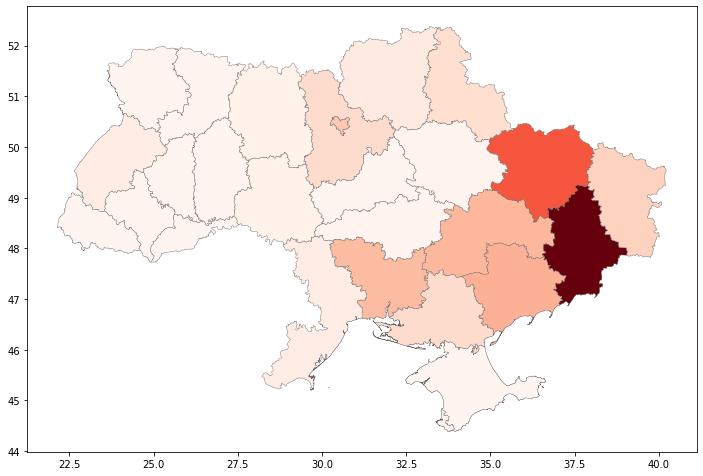

In [ ]:
fig, ax = plt.subplots(1, figsize=(12, 12))
ukraine_map.plot(
    column="strike_count", cmap="Reds", linewidth=0.4, ax=ax, edgecolor=".4"
)

<Axes: xlabel='region'>

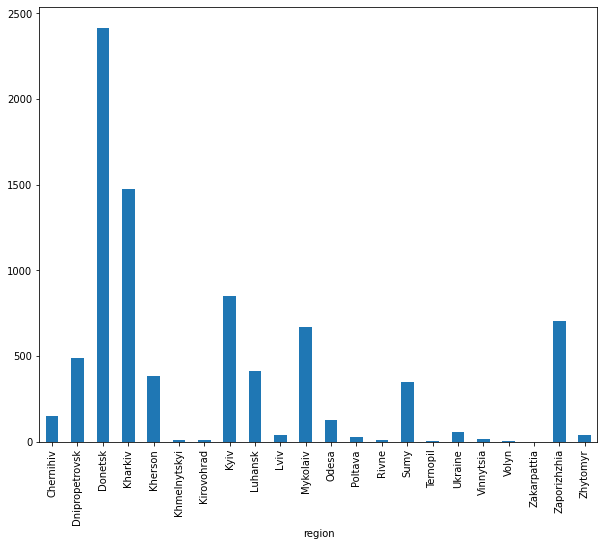

In [ ]:
df_final_pkl
counts = df_final_pkl.groupby(['region']).size()
counts.plot(kind='bar', stacked=True, figsize=(10, 8))


<ipython-input-50-7f7559d1c231>:7: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_series = top_5.append(other)


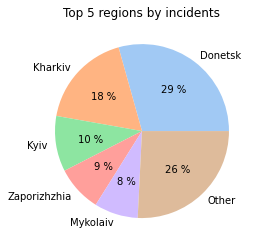

In [ ]:
import seaborn as sns
colors = sns.color_palette('pastel')
counts = df_final_pkl['region'].value_counts()
frequency_sorted = counts.sort_values(ascending=False)
top_5 = frequency_sorted[:5]
other = pd.Series(frequency_sorted[5:].sum(), index=['Other'])
new_series = top_5.append(other)
percentages = (new_series / new_series.sum()) * 100
plt.pie(percentages, colors=colors, labels=percentages.index, autopct='%.0f %%')
plt.title('Top 5 regions by incidents')
plt.show()